In [0]:
import nibabel as nib
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
from keras.models import Model
from keras import optimizers
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.layers import Dropout
from keras.layers import Conv3D, MaxPooling3D
from keras.layers import Input
from keras.utils import plot_model
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **`T1 Analysis `**

In [0]:
img_T1 = nib.load("/content/gdrive/My Drive/Radiology/T1.tpl.nii")

In [5]:
img_T1.shape

(193, 229, 193)

In [0]:
img_T1 = img_T1.get_fdata()

In [7]:
img_T1.shape

(193, 229, 193)

In [8]:
type(img_T1)

numpy.memmap

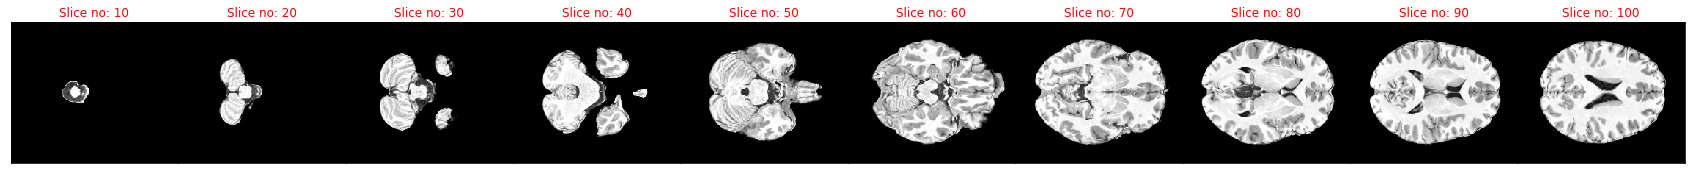

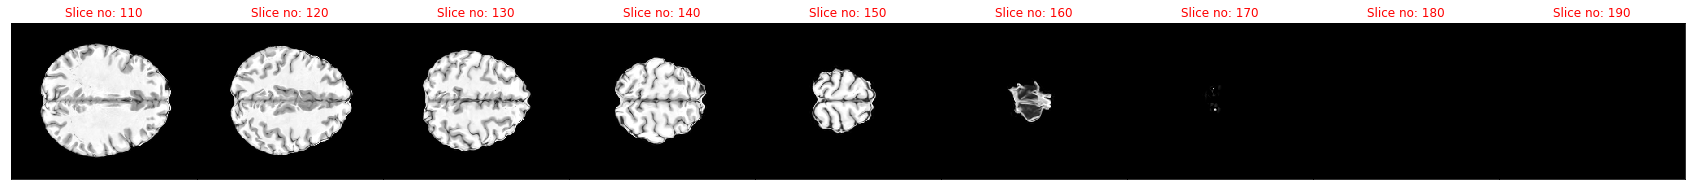

In [0]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 10, figsize=[30, 10])

n = 0
slice = 10
for _ in range(10):
    ax[n].imshow(img_T1[:, :, slice], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title('Slice no: {}'.format(slice), color='r')
    n += 1
    slice += 10
   
    fig.subplots_adjust(wspace=0, hspace=0)
plt.show()


fig, ax = plt.subplots(1, 9, figsize=[30, 10])

n = 0
slice = 110
for _ in range(9):
    ax[n].imshow(img_T1[:, :, slice], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title('Slice no: {}'.format(slice), color='r')
    n += 1
    slice += 10
   
    fig.subplots_adjust(wspace=0, hspace=0)
plt.show()


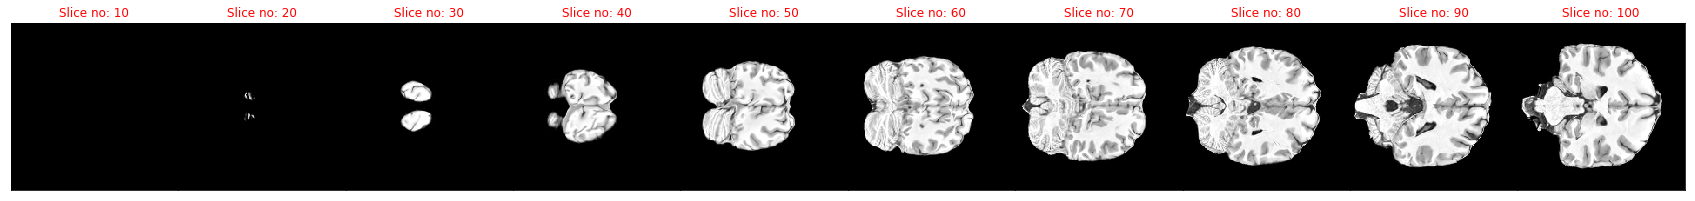

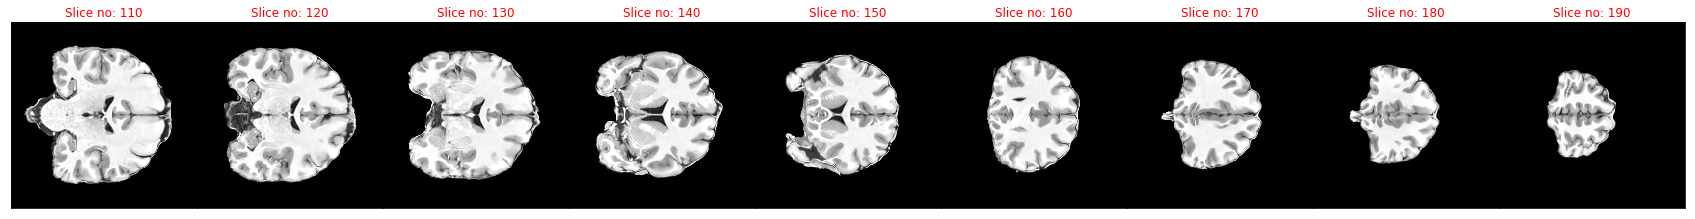

In [0]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 10, figsize=[30, 10])

n = 0
slice = 10
for _ in range(10):
    ax[n].imshow(img_T1[:, slice, :], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title('Slice no: {}'.format(slice), color='r')
    n += 1
    slice += 10
   
    fig.subplots_adjust(wspace=0, hspace=0)
plt.show()


fig, ax = plt.subplots(1, 9, figsize=[30, 10])

n = 0
slice = 110
for _ in range(9):
    ax[n].imshow(img_T1[:, slice, :], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title('Slice no: {}'.format(slice), color='r')
    n += 1
    slice += 10
   
    fig.subplots_adjust(wspace=0, hspace=0)
plt.show()


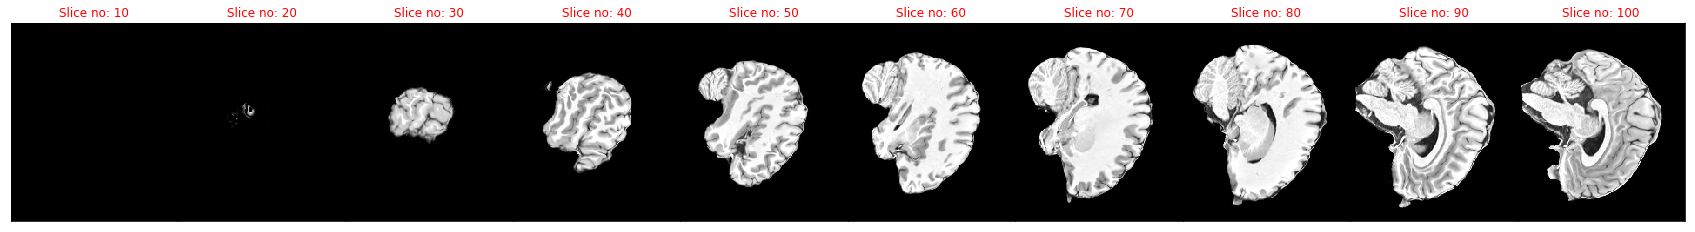

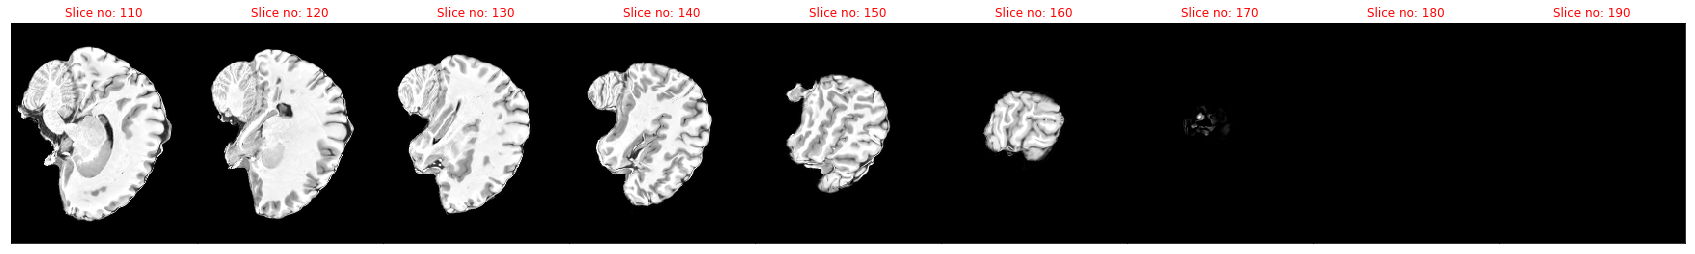

In [0]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 10, figsize=[30, 10])

n = 0
slice = 10
for _ in range(10):
    ax[n].imshow(img_T1[slice, :, :], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title('Slice no: {}'.format(slice), color='r')
    n += 1
    slice += 10
   
    fig.subplots_adjust(wspace=0, hspace=0)
plt.show()


fig, ax = plt.subplots(1, 9, figsize=[30, 10])

n = 0
slice = 110
for _ in range(9):
    ax[n].imshow(img_T1[slice, :, :], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title('Slice no: {}'.format(slice), color='r')
    n += 1
    slice += 10
   
    fig.subplots_adjust(wspace=0, hspace=0)
plt.show()


# **`DTI Analysis `**

In [9]:
img_DTI = nib.load("/content/gdrive/My Drive/Radiology/fa.tpl.nii")
img_DTI.shape

(193, 229, 193)

In [10]:
data = img_DTI.get_fdata()
data.shape


(193, 229, 193)

In [11]:
type(data)

numpy.memmap

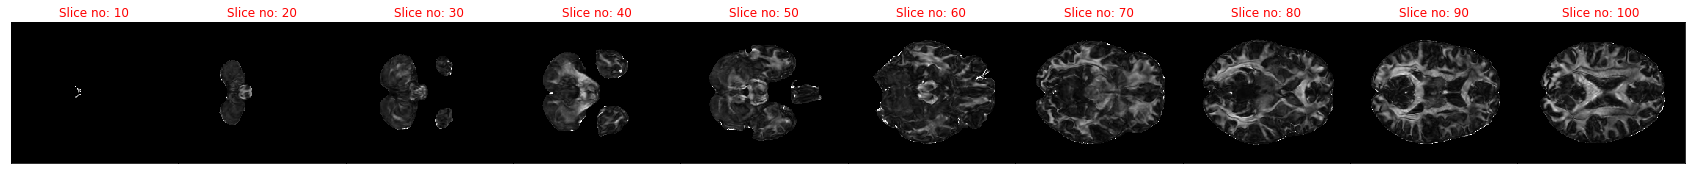

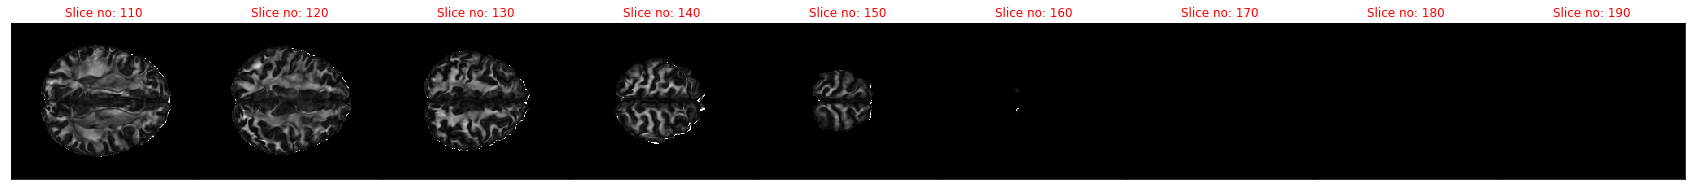

In [0]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 10, figsize=[30, 10])

n = 0
slice = 10
for _ in range(10):
    ax[n].imshow(data[:, :, slice], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title('Slice no: {}'.format(slice), color='r')
    n += 1
    slice += 10
   
    fig.subplots_adjust(wspace=0, hspace=0)
plt.show()


fig, ax = plt.subplots(1, 9, figsize=[30, 10])

n = 0
slice = 110
for _ in range(9):
    ax[n].imshow(data[:, :, slice], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title('Slice no: {}'.format(slice), color='r')
    n += 1
    slice += 10
   
    fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

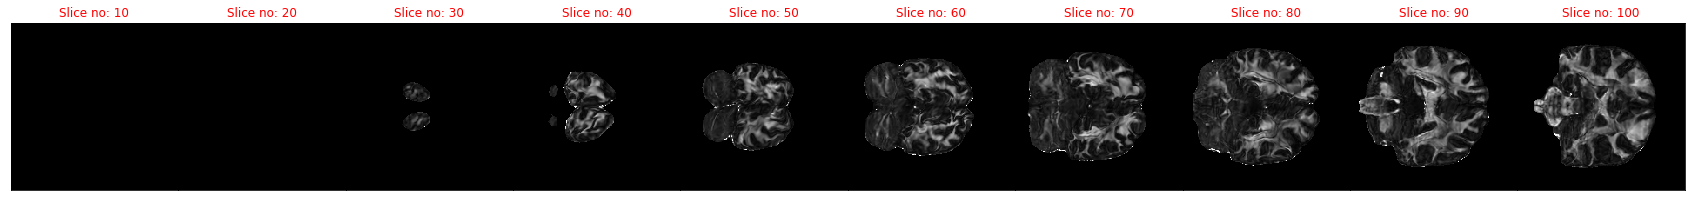

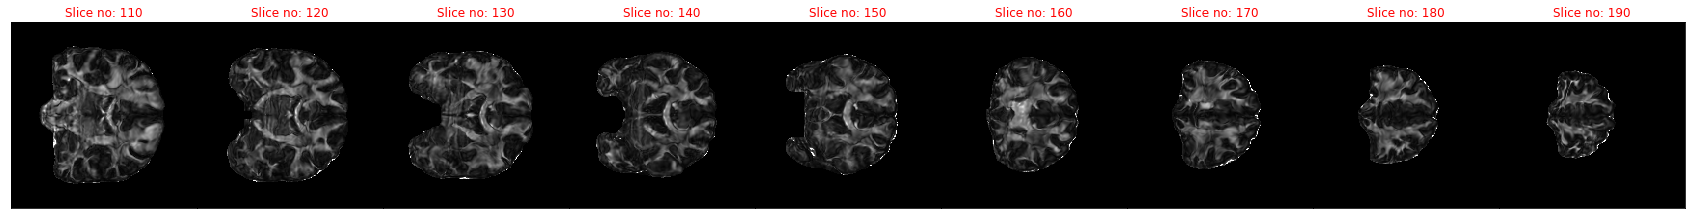

In [0]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 10, figsize=[30, 10])

n = 0
slice = 10
for _ in range(10):
    ax[n].imshow(data[:, slice, :], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title('Slice no: {}'.format(slice), color='r')
    n += 1
    slice += 10
   
    fig.subplots_adjust(wspace=0, hspace=0)
plt.show()


fig, ax = plt.subplots(1, 9, figsize=[30, 10])

n = 0
slice = 110
for _ in range(9):
    ax[n].imshow(data[:, slice, :], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title('Slice no: {}'.format(slice), color='r')
    n += 1
    slice += 10
   
    fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

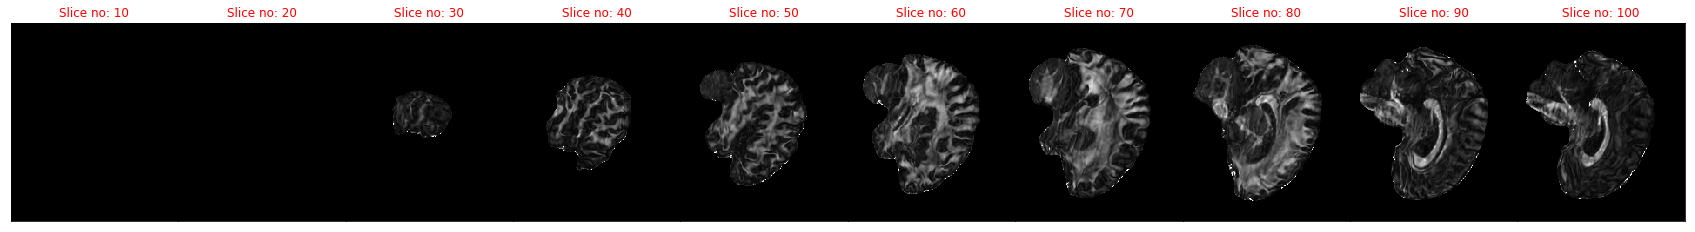

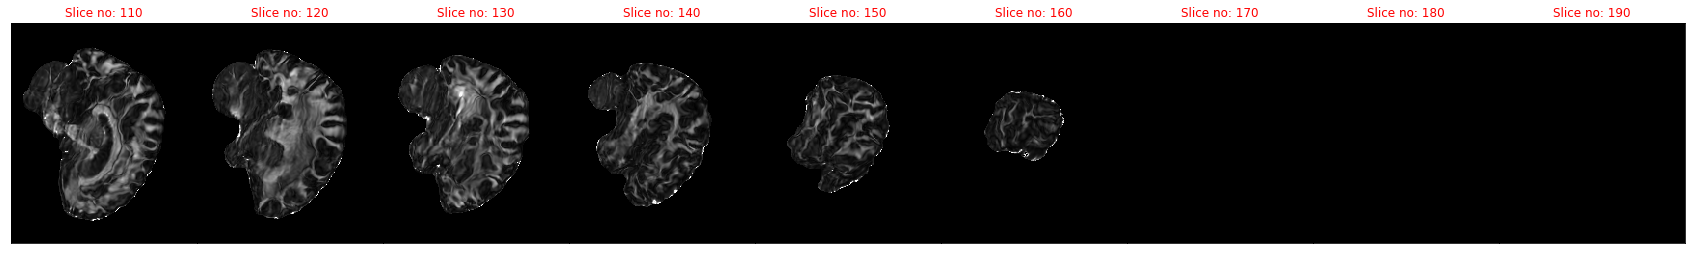

In [0]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 10, figsize=[30, 10])

n = 0
slice = 10
for _ in range(10):
    ax[n].imshow(data[slice, :, :], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title('Slice no: {}'.format(slice), color='r')
    n += 1
    slice += 10
   
    fig.subplots_adjust(wspace=0, hspace=0)
plt.show()


fig, ax = plt.subplots(1, 9, figsize=[30, 10])

n = 0
slice = 110
for _ in range(9):
    ax[n].imshow(data[slice, :, :], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title('Slice no: {}'.format(slice), color='r')
    n += 1
    slice += 10
   
    fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

# ***CNN Architecture (Individual)***

**T1 image **

In [0]:
X_train = img_T1.reshape(1,193, 229, 193,1)
from numpy import array

#Dummy Y
y_train = keras.utils.to_categorical(np.random.randint(3, size=(1, 1)), num_classes=3)


In [25]:
X_train.shape

(1, 193, 229, 193, 1)

In [0]:

def build_model():
  
  model = Sequential()
  model.add(Conv3D(32, kernel_size=(5,5,5), strides=(1, 1, 1), input_shape=(193, 229, 193,1)))
  model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=None, padding='valid', data_format=None))
  model.add(Conv3D(32, kernel_size=(5,5,5), strides=(1, 1, 1)))
  model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=None, padding='valid', data_format=None))
  model.add(Conv3D(32, kernel_size=(5,5,5), strides=(1, 1, 1)))
  model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=None, padding='valid', data_format=None))
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(3, activation='softmax'))

  return model

model = build_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=3,batch_size=1)

**DTI image**

In [0]:
X_train = data.reshape(1,193, 229, 193,1)
from numpy import array

#Dummy Y
y_train = keras.utils.to_categorical(np.random.randint(3, size=(1, 1)), num_classes=3)


In [0]:

def build_model():
  
  model = Sequential()
  model.add(Conv3D(32, kernel_size=(5,5,5), strides=(1, 1, 1), input_shape=(193, 229, 193,1)))
  model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=None, padding='valid'))
  model.add(Conv3D(32, kernel_size=(5,5,5), strides=(1, 1, 1)))
  model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=None, padding='valid', data_format=None))
  model.add(Conv3D(32, kernel_size=(5,5,5), strides=(1, 1, 1)))
  model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=None, padding='valid', data_format=None))
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(3, activation='softmax'))

  return model

model = build_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=3,batch_size=1)

# **CNN Architecture combined**

In [18]:

input1 = Input(shape=(193, 229, 193,1))

conv_mri1 = Conv3D(32, kernel_size=(5,5,5), strides=(1, 1, 1), activation='relu')(input1)
pool_mri1 = MaxPooling3D(pool_size=(2, 2, 2), strides=None, padding='valid')(conv_mri1)
conv_mri2 = Conv3D(32, kernel_size=(5,5,5), strides=(1, 1, 1), activation='relu')(pool_mri1)
pool_mri2 = MaxPooling3D(pool_size=(2, 2, 2), strides=None, padding='valid')(conv_mri2)
conv_mri3 = Conv3D(32, kernel_size=(5,5,5), strides=(1, 1, 1), activation='relu')(pool_mri2)
pool_mri3 = MaxPooling3D(pool_size=(2, 2, 2), strides=None, padding='valid')(conv_mri3)
flat_mri = Flatten()(pool_mri3)
fc1_mri = Dense(512, activation='relu')(flat_mri)
fc2_mri = Dense(64, activation='relu')(fc1_mri)


input2 = Input(shape=(193, 229, 193,1))
conv_dti1 = Conv3D(32, kernel_size=(5,5,5), strides=(1, 1, 1), activation='relu')(input2)
pool_dti1 = MaxPooling3D(pool_size=(2, 2, 2), strides=None, padding='valid')(conv_dti1)
conv_dti2 = Conv3D(32, kernel_size=(5,5,5), strides=(1, 1, 1), activation='relu')(pool_dti1)
pool_dti2 = MaxPooling3D(pool_size=(2, 2, 2), strides=None, padding='valid')(conv_dti2)
conv_dti3 = Conv3D(32, kernel_size=(5,5,5), strides=(1, 1, 1), activation='relu')(pool_dti2)
pool_dti3 = MaxPooling3D(pool_size=(2, 2, 2), strides=None, padding='valid')(conv_dti3)
flat_dti = Flatten()(pool_dti3)
fc1_dti = Dense(512, activation='relu')(flat_dti)
fc2_dti = Dense(64, activation='relu')(fc1_dti)

fc2_concatenated = keras.layers.concatenate([fc2_mri, fc2_dti])
output = Dense(3, activation='softmax')(fc2_concatenated)

model = Model(inputs=[input1, input2], outputs=output)

# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='/content/gdrive/My Drive/Radiology/convolutional_neural_network.png')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 193, 229, 193 0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 193, 229, 193 0                                            
__________________________________________________________________________________________________
conv3d_7 (Conv3D)               (None, 189, 225, 189 4032        input_3[0][0]                    
__________________________________________________________________________________________________
conv3d_10 (Conv3D)              (None, 189, 225, 189 4032        input_4[0][0]                    
__________________________________________________________________________________________________
max_poolin

In [0]:
input1 = img_T1.reshape(1,193, 229, 193,1)
input2 = data.reshape(1,193, 229, 193,1)
y_train = keras.utils.to_categorical(np.random.randint(3, size=(1, 1)), num_classes=3)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit([input1,input2], y_train, epochs=3,batch_size=1)

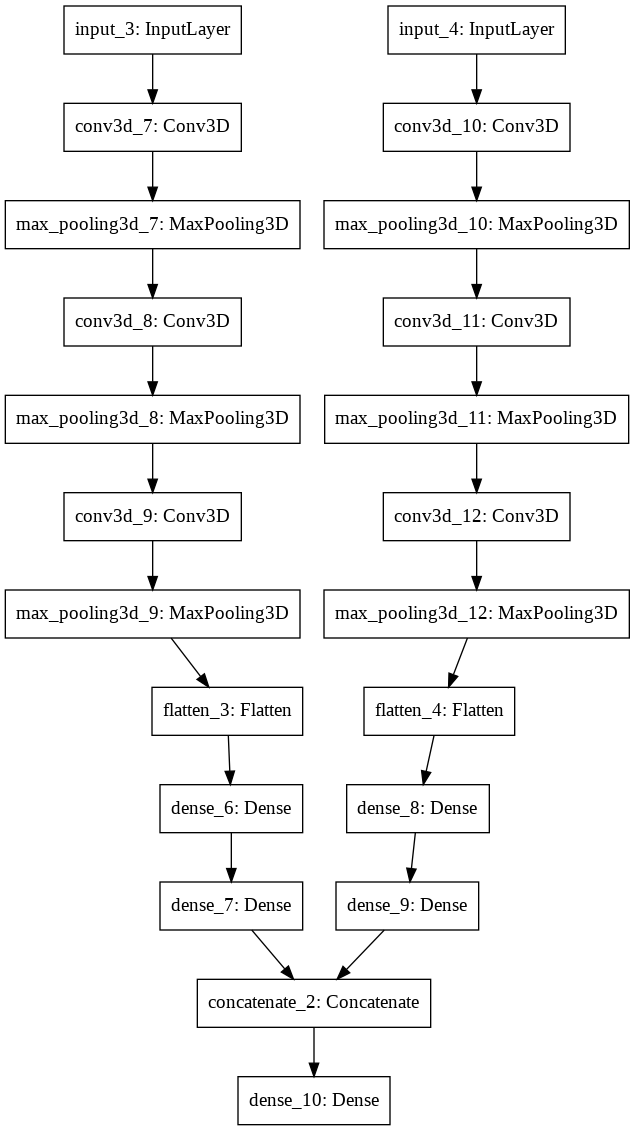

In [29]:
from PIL import Image
jpgfile = Image.open("/content/gdrive/My Drive/Radiology/convolutional_neural_network.png")
jpgfile